# Coding Dojo Summit 2023: DS Team Meeting
- 01/03/23
- Companion notebook used to create slide deck: https://docs.google.com/presentation/d/19I_Kya2mucbXsNejXdJM__HE7HJIS5pufs_-gIWd6YY/edit?usp=sharing


# Part 1 - Model Insights

## Code

In [1]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
# sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [2]:
lp.show_code(CODE.lp_styles)
from CODE.lp_styles import *
# plt.rcParams['figure.figsize'] = (12, 8)

```python
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

```

In [3]:
# Function for Showing Source Code in Markdown with Python Syntax
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [4]:
## Preprocessing Imports ([ ] TO DO: Consider making preprocess_imports module)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats


## fixing random for lesson generation
np.random.seed(321)


## Load Data 

In [5]:
## Load in data
FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

### Simple Feature Engineering (datatypes)

In [6]:
# Date feature engineering 
# df['datetime'] = pd.to_datetime(df['date'])

# # df['Month'] =  df['datetime'].dt.month_name() 
# df['Month'] = df['datetime'].dt.month
# df['Year'] = df['datetime'].dt.year

df = df.set_index('id')
df.head()

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        1050   
1954400510      8080     1.0           0     0          3      8        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [7]:
## Convert all categories to strings
convert_to_str = ['zipcode']
df[convert_to_str] = df[convert_to_str].astype(str)

In [8]:
## Drop unwanted columns
drop_cols = ['date']#,'datetime']
df_ml = df.drop(columns=drop_cols)
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178  47.5112 -122.257           1340   
6414100192      1951          1991   98125  47.7210 -122.319           1690   
5631500400      1933             0   98028  47.7379 -122.233           2720   
2487200875      1965             0   98136  47.5208 -122.393           1360   
1954400510      1987             0   98074  47.6168 -122.045           1800   
...              ...           ...     ...      ...      ...            ...   
263000018       2009             0   98103  47.6993 -122.346           1530   
6600060120      2014             0   98146  47.5107 -122.362           1830   
1523300141      2009             0   98144  47.5944 -122.299           1020   
291310100       2004             0   98027  47.5345 -122.069           1410   
1523300157      2008             0   98144  47.5941 -122.299           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21613 rows x 19 columns]

In [9]:
## final info before X/y
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64

In [10]:
df_ml.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Removing Outliers (from target)

- This dataset is known to be a tricky regression without addressing assumptions of linear regression.
- Doing M.V.P. removal of outliers from target.

<AxesSubplot:xlabel='price'>

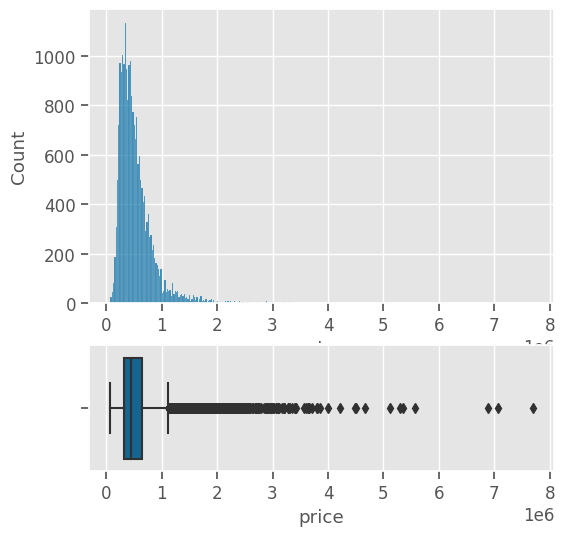

In [11]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6), gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

In [12]:
import scipy.stats as stats
idx_outliers = np.abs(stats.zscore(df_ml['price']) )>3
idx_outliers.sum()

406

In [13]:
# saving non-outliers
df_ml = df_ml[~idx_outliers].copy()
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178  47.5112 -122.257           1340   
6414100192      1951          1991   98125  47.7210 -122.319           1690   
5631500400      1933             0   98028  47.7379 -122.233           2720   
2487200875      1965             0   98136  47.5208 -122.393           1360   
1954400510      1987             0   98074  47.6168 -122.045           1800   
...              ...           ...     ...      ...      ...            ...   
263000018       2009             0   98103  47.6993 -122.346           1530   
6600060120      2014             0   98146  47.5107 -122.362           1830   
1523300141      2009             0   98144  47.5944 -122.299           1020   
291310100       2004             0   98027  47.5345 -122.069           1410   
1523300157      2008             0   98144  47.5941 -122.299           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21207 rows x 19 columns]

<AxesSubplot:xlabel='price'>

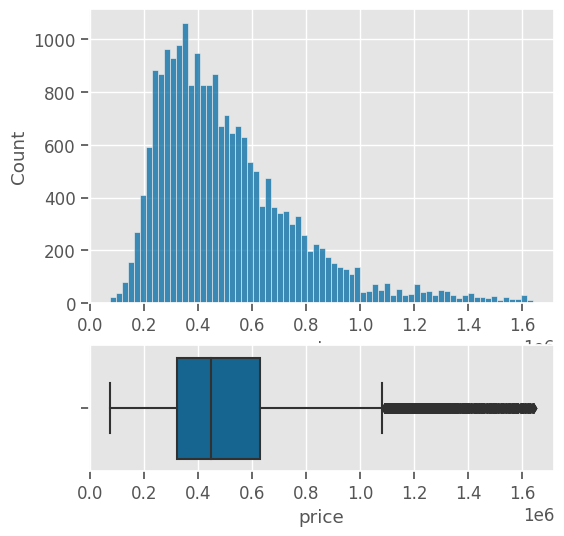

In [14]:
# visualizing final target
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6),gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

## Preprocessing with Scikit-Learn 1.1+

In [15]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


### Preprocessing + ColumnTransformer


In [16]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090         3       1.00         1120      7320     1.0           0   
8563000110         4       1.75         1460      9750     1.0           0   
2591800340         3       2.25         1820      7420     2.0           0   
7215721330         3       2.50         1650      4218     2.0           0   
2424059061         4       3.50         3500     43560     2.0           0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090     0          4      7        1120              0      1954   
8563000110     0          4      7        1460              0      1967   
2591800340     0          4      8        1820              0      1983   
7215721330     0          3      8        1650              0      2000   
2424059061     0          3      9        2850            650      2014   

            yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  
id                                                                             
2895600090             0   98146  47.5103 -122.382           1410        6328  
8563000110             0   98008  47.6205 -122.102           1820        9840  
2591800340             0   98058  47.4368 -122.162           1900        7526  
7215721330             0   98075  47.5998 -122.016           1650        4559  
2424059061             0   98006  47.5481 -122.103           3640       40545

In [17]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False) )
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [18]:
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

>- Note: So far, all of the code should be familiar to you. 
    -  With sklearn v1.1+, you should always add `verbose_feature_names_out=False` to column transformers *`ColumnTransformer`/ `make_column_transformer`)
        - (If you want to see what the verbose version looks like feel free to give it a try!)

In [19]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x145353be0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x145336cd0>)],
                  verbose_feature_names_out=False)

In [20]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98

In [21]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090       3.0       1.00       1120.0    7320.0     1.0         0.0   
8563000110       4.0       1.75       1460.0    9750.0     1.0         0.0   
2591800340       3.0       2.25       1820.0    7420.0     2.0         0.0   
7215721330       3.0       2.50       1650.0    4218.0     2.0         0.0   
2424059061       4.0       3.50       3500.0   43560.0     2.0         0.0   
...              ...        ...          ...       ...     ...         ...   
3211200140       4.0       2.00       1720.0    7210.0     1.0         0.0   
6381502155       3.0       1.00       1490.0    7200.0     1.0         0.0   
8964800695       3.0       1.75       2230.0   13529.0     1.0         0.0   
2320069206       3.0       1.00       1250.0    8276.0     1.5         0.0   
624100010        3.0       2.50       2930.0   19900.0     1.5         0.0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090   0.0        4.0    7.0      1120.0            0.0    1954.0   
8563000110   0.0        4.0    7.0      1460.0            0.0    1967.0   
2591800340   0.0        4.0    8.0      1820.0            0.0    1983.0   
7215721330   0.0        3.0    8.0      1650.0            0.0    2000.0   
2424059061   0.0        3.0    9.0      2850.0          650.0    2014.0   
...          ...        ...    ...         ...            ...       ...   
3211200140   0.0        3.0    7.0       860.0          860.0    1971.0   
6381502155   0.0        3.0    7.0      1490.0            0.0    1954.0   
8964800695   0.0        3.0    9.0      2230.0            0.0    1949.0   
2320069206   0.0        5.0    6.0      1250.0            0.0    1939.0   
624100010    0.0        3.0    9.0      2930.0            0.0    1983.0   

            yr_renovated      lat     long  sqft_living15  sqft_lot15  \
id                                                                      
2895600090           0.0  47.5103 -122.382         1410.0      6328.0   
8563000110           0.0  47.6205 -122.102         1820.0      9840.0   
2591800340           0.0  47.4368 -122.162         1900.0      7526.0   
7215721330           0.0  47.5998 -122.016         1650.0      4559.0   
2424059061           0.0  47.5481 -122.103         3640.0     40545.0   
...                  ...      ...      ...            ...         ...   
3211200140           0.0  47.7307 -122.239         1250.0      7210.0   
6381502155           0.0  47.7276 -122.307         1280.0      7200.0   
8964800695           0.0  47.6204 -122.217         2230.0     11900.0   
2320069206           0.0  47.2092 -121.997         1250.0      8792.0   
624100010            0.0  47.7234 -122.066         3160.0     20492.0   

            zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
id                                                                       
2895600090            0.0            0.0            0.0            0.0   
8563000110            0.0            0.0            0.0            0.0   
2591800340            0.0            0.0            0.0            0.0   
7215721330            0.0            0.0            0.0            0.0   
2424059061            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
3211200140            0.0            0.0            0.0            0.0   
6381502155            0.0            0.0            0.0            0.0   
8964800695            0.0            0.0            0.0            1.0   
2320069206            0.0            0.0            0.0            0.0   
624100010             0.0            0.0            0.0            0.0   

            zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
id                                

In [22]:
## Customization Options
pd.set_option("display.max_columns",100)
X_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090       3.0       1.00       1120.0    7320.0     1.0         0.0   
8563000110       4.0       1.75       1460.0    9750.0     1.0         0.0   
2591800340       3.0       2.25       1820.0    7420.0     2.0         0.0   
7215721330       3.0       2.50       1650.0    4218.0     2.0         0.0   
2424059061       4.0       3.50       3500.0   43560.0     2.0         0.0   
...              ...        ...          ...       ...     ...         ...   
3211200140       4.0       2.00       1720.0    7210.0     1.0         0.0   
6381502155       3.0       1.00       1490.0    7200.0     1.0         0.0   
8964800695       3.0       1.75       2230.0   13529.0     1.0         0.0   
2320069206       3.0       1.00       1250.0    8276.0     1.5         0.0   
624100010        3.0       2.50       2930.0   19900.0     1.5         0.0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090   0.0        4.0    7.0      1120.0            0.0    1954.0   
8563000110   0.0        4.0    7.0      1460.0            0.0    1967.0   
2591800340   0.0        4.0    8.0      1820.0            0.0    1983.0   
7215721330   0.0        3.0    8.0      1650.0            0.0    2000.0   
2424059061   0.0        3.0    9.0      2850.0          650.0    2014.0   
...          ...        ...    ...         ...            ...       ...   
3211200140   0.0        3.0    7.0       860.0          860.0    1971.0   
6381502155   0.0        3.0    7.0      1490.0            0.0    1954.0   
8964800695   0.0        3.0    9.0      2230.0            0.0    1949.0   
2320069206   0.0        5.0    6.0      1250.0            0.0    1939.0   
624100010    0.0        3.0    9.0      2930.0            0.0    1983.0   

            yr_renovated      lat     long  sqft_living15  sqft_lot15  \
id                                                                      
2895600090           0.0  47.5103 -122.382         1410.0      6328.0   
8563000110           0.0  47.6205 -122.102         1820.0      9840.0   
2591800340           0.0  47.4368 -122.162         1900.0      7526.0   
7215721330           0.0  47.5998 -122.016         1650.0      4559.0   
2424059061           0.0  47.5481 -122.103         3640.0     40545.0   
...                  ...      ...      ...            ...         ...   
3211200140           0.0  47.7307 -122.239         1250.0      7210.0   
6381502155           0.0  47.7276 -122.307         1280.0      7200.0   
8964800695           0.0  47.6204 -122.217         2230.0     11900.0   
2320069206           0.0  47.2092 -121.997         1250.0      8792.0   
624100010            0.0  47.7234 -122.066         3160.0     20492.0   

            zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
id                                                                       
2895600090            0.0            0.0            0.0            0.0   
8563000110            0.0            0.0            0.0            0.0   
2591800340            0.0            0.0            0.0            0.0   
7215721330            0.0            0.0            0.0            0.0   
2424059061            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
3211200140            0.0            0.0            0.0            0.0   
6381502155            0.0            0.0            0.0            0.0   
8964800695            0.0            0.0            0.0            1.0   
2320069206            0.0            0.0            0.0            0.0   
624100010             0.0            0.0            0.0            0.0   

            zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
id                                

# Modeling - Linear Regression 

In [23]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")



## Model 1

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, 
                    X_test_df, y_test)

In [25]:
reg.coef_

array([-9.04536112e+03,  1.57156246e+04,  2.42444812e+12,  3.01893634e-01,
       -2.01091403e+04,  2.35012593e+05,  4.49538993e+04,  2.50336039e+04,
        5.28909923e+04, -2.42444812e+12, -2.42444812e+12, -5.32522813e+02,
        2.11218416e+01,  1.57908246e+05, -5.26882814e+04,  3.43733386e+01,
       -6.75259504e-02, -1.89134930e+08, -1.89117666e+08, -1.89151902e+08,
       -1.88566176e+08, -1.88865580e+08, -1.88892260e+08, -1.88922385e+08,
       -1.88938799e+08, -1.89040753e+08, -1.89071968e+08, -1.89071215e+08,
       -1.89089911e+08, -1.89117278e+08, -1.89168401e+08, -1.89007497e+08,
       -1.88972994e+08, -1.89075836e+08, -1.88945226e+08, -1.89136546e+08,
       -1.89136888e+08, -1.89149857e+08, -1.88838091e+08, -1.89005702e+08,
       -1.89096633e+08, -1.88417462e+08, -1.88703081e+08, -1.89130314e+08,
       -1.89031535e+08, -1.88938918e+08, -1.88954903e+08, -1.89112191e+08,
       -1.89063266e+08, -1.89119942e+08, -1.89058259e+08, -1.89039703e+08,
       -1.89071177e+08, -

In [26]:
reg.intercept_

175808321.20888373

In [27]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs

bedrooms        -9.045361e+03
bathrooms        1.571562e+04
sqft_living      2.424448e+12
sqft_lot         3.018936e-01
floors          -2.010914e+04
                     ...     
zipcode_98177   -1.889847e+08
zipcode_98178   -1.891176e+08
zipcode_98188   -1.891213e+08
zipcode_98198   -1.891327e+08
zipcode_98199   -1.888235e+08
Length: 87, dtype: float64

In [28]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 100)

In [29]:
coeffs

bedrooms                    -9,045.3611
bathrooms                   15,715.6246
sqft_living      2,424,448,119,220.4526
sqft_lot                         0.3019
floors                     -20,109.1403
waterfront                 235,012.5926
view                        44,953.8993
condition                   25,033.6039
grade                       52,890.9923
sqft_above      -2,424,448,119,090.7319
sqft_basement   -2,424,448,119,139.8687
yr_built                      -532.5228
yr_renovated                    21.1218
lat                        157,908.2459
long                       -52,688.2814
sqft_living15                   34.3733
sqft_lot15                      -0.0675
zipcode_98001         -189,134,929.9337
zipcode_98002         -189,117,665.9085
zipcode_98003         -189,151,902.0069
zipcode_98004         -188,566,176.2421
zipcode_98005         -188,865,579.9699
zipcode_98006         -188,892,260.0631
zipcode_98007         -188,922,384.9866
zipcode_98008         -188,938,798.9894


In [30]:
coeffs.sort_values()

sqft_basement   -2,424,448,119,139.8687
sqft_above      -2,424,448,119,090.7319
zipcode_98023         -189,168,400.7830
zipcode_98092         -189,156,729.4368
zipcode_98003         -189,151,902.0069
zipcode_98032         -189,149,856.7641
zipcode_98031         -189,136,888.4543
zipcode_98030         -189,136,545.9677
zipcode_98001         -189,134,929.9337
zipcode_98198         -189,132,742.2407
zipcode_98042         -189,130,313.5195
zipcode_98188         -189,121,253.0965
zipcode_98058         -189,119,941.7385
zipcode_98002         -189,117,665.9085
zipcode_98178         -189,117,584.1072
zipcode_98022         -189,117,277.8616
zipcode_98055         -189,112,191.0485
zipcode_98168         -189,104,084.8494
zipcode_98148         -189,103,205.7742
zipcode_98038         -189,096,633.1544
zipcode_98019         -189,089,911.4820
zipcode_98028         -189,075,836.4206
zipcode_98166         -189,073,914.8176
zipcode_98011         -189,071,968.3572
zipcode_98014         -189,071,214.5663


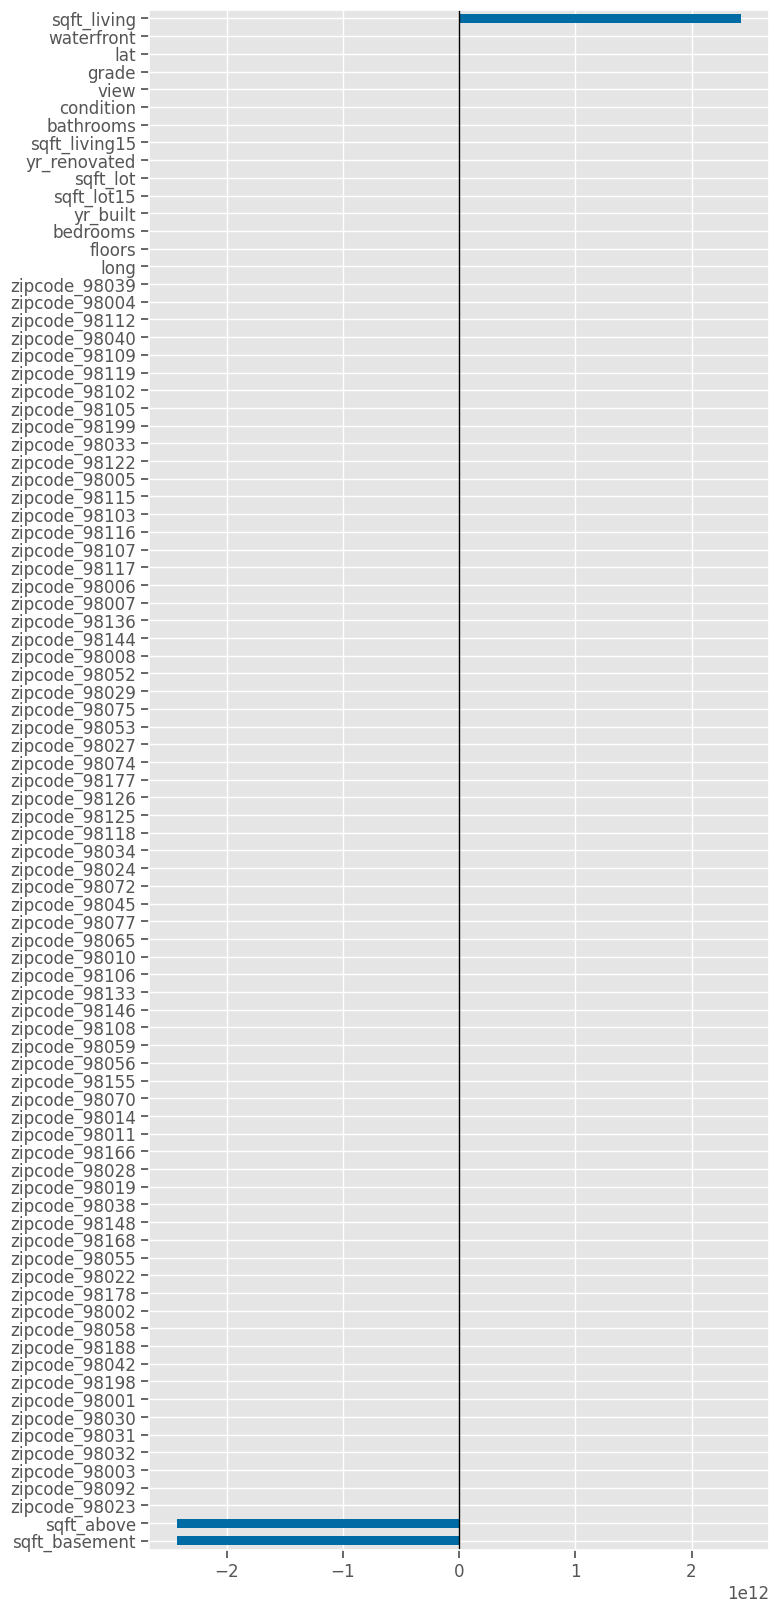

In [31]:
# with sns.plotting_context('notebook'):
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

In [32]:
df_ml.select_dtypes('object').nunique()

zipcode    70
dtype: int64

> Zipcodes are causing multicollinearity issue. One approach would be to use rare label encoding with thew OneHotEncoder, but for now, we will drop.

## Model 2  (SLIDES)

> Matches Slide Deck Regression

In [33]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view','sqft_lot', 'view',
                   'condition','grade','sqft_above','sqft_basement',
                   'yr_renovated','sqft_living15', 'sqft_lot15']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=15
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living  floors  waterfront   yr_built
id                                                                         
2895600090    3.0000     1.0000   1,120.0000  1.0000      0.0000 1,954.0000
8563000110    4.0000     1.7500   1,460.0000  1.0000      0.0000 1,967.0000
2591800340    3.0000     2.2500   1,820.0000  2.0000      0.0000 1,983.0000
7215721330    3.0000     2.5000   1,650.0000  2.0000      0.0000 2,000.0000
2424059061    4.0000     3.5000   3,500.0000  2.0000      0.0000 2,014.0000
...              ...        ...          ...     ...         ...        ...
3211200140    4.0000     2.0000   1,720.0000  1.0000      0.0000 1,971.0000
6381502155    3.0000     1.0000   1,490.0000  1.0000      0.0000 1,954.0000
8964800695    3.0000     1.7500   2,230.0000  1.0000      0.0000 1,949.0000
2320069206    3.0000     1.0000   1,250.0000  1.5000      0.0000 1,939.0000
624100010     3.0000     2.5000   2,930.0000  1.5000      0.0000 1,983.0000

[15905 rows x 6 columns]

In [34]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [35]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

bedrooms        -38,303.1744
bathrooms        48,126.0203
sqft_living         214.9420
floors           64,514.0470
waterfront      281,242.3219
yr_built         -2,599.5354
Intercept     5,124,664.8032
dtype: float64

In [36]:
def get_coeffs(reg):
    ## Saving the coefficients
    coeffs = pd.Series(reg.coef_, index= reg.feature_names_in_)
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

In [37]:
# ## Saving the coefficients
# coeffs = pd.Series(reg.coef_, index= feature_names)
# coeffs.sort_values()
coeffs = get_coeffs(reg)
coeffs

bedrooms        -38,303.1744
bathrooms        48,126.0203
sqft_living         214.9420
floors           64,514.0470
waterfront      281,242.3219
yr_built         -2,599.5354
Intercept     5,124,664.8032
dtype: float64

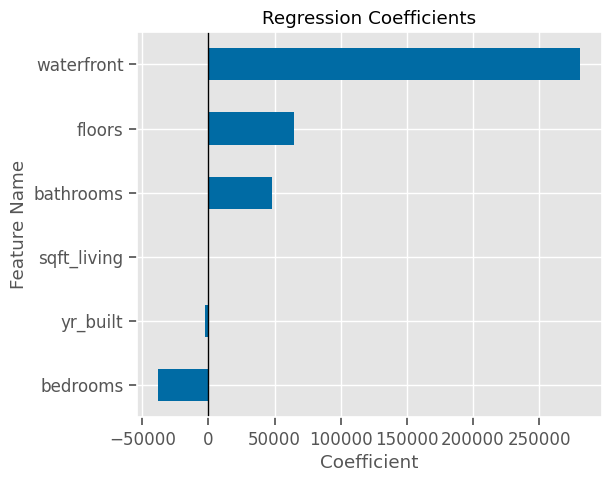

In [38]:
def plot_coefficients(coeffs, figsize=(6,5), title='Regression Coefficients',
                      intercept=True, intercept_name='Intercept',
                      sort_values=True, ascending=True, 
                      ):
    ## Exclude intercept if intercept==False
    if intercept==False:
        if intercept_name in coeffs:
            coeffs = coeffs.drop(intercept_name).copy()
    
    ## Sort values
    if sort_values:
        ceoffs = coeffs.sort_values(ascending=ascending)
 
    ## Plot
    ax = ceoffs.plot(kind='barh',figsize=figsize)
    
    ## Customize Viz 
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
    return ax


ax = plot_coefficients(coeffs, intercept=False)


### Tick Formatting

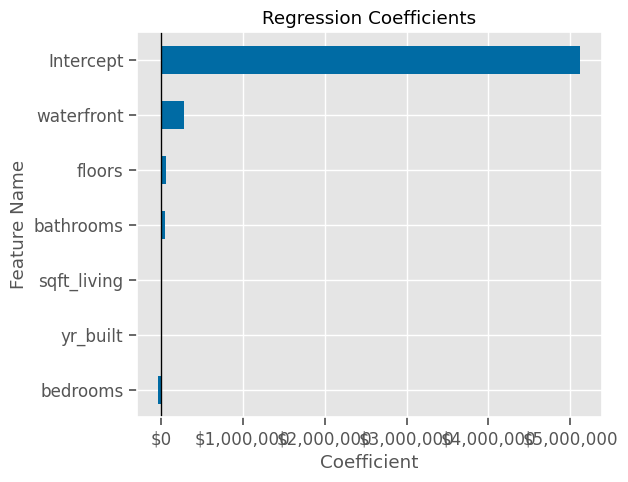

In [39]:
from matplotlib import ticker

ax = plot_coefficients(coeffs)

price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

In [40]:
## Make a "hundred_thousands" function 
def hundred_thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}k"

price_fmt_thous = ticker.FuncFormatter(hundred_thousands)

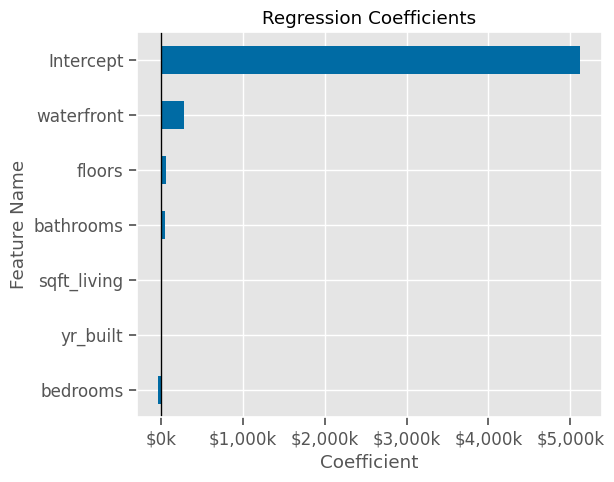

In [41]:
ax = plot_coefficients(coeffs)
ax.xaxis.set_major_formatter(price_fmt_thous)

# EDA on Selected Features

> SLIDE IMAGES: Individual Regplots

In [42]:
plot_df = pd.concat([X_train_df, y_train], axis=1)
plot_df

bedrooms  bathrooms  sqft_living  floors  waterfront   yr_built  \
id                                                                            
2895600090    3.0000     1.0000   1,120.0000  1.0000      0.0000 1,954.0000   
8563000110    4.0000     1.7500   1,460.0000  1.0000      0.0000 1,967.0000   
2591800340    3.0000     2.2500   1,820.0000  2.0000      0.0000 1,983.0000   
7215721330    3.0000     2.5000   1,650.0000  2.0000      0.0000 2,000.0000   
2424059061    4.0000     3.5000   3,500.0000  2.0000      0.0000 2,014.0000   
...              ...        ...          ...     ...         ...        ...   
3211200140    4.0000     2.0000   1,720.0000  1.0000      0.0000 1,971.0000   
6381502155    3.0000     1.0000   1,490.0000  1.0000      0.0000 1,954.0000   
8964800695    3.0000     1.7500   2,230.0000  1.0000      0.0000 1,949.0000   
2320069206    3.0000     1.0000   1,250.0000  1.5000      0.0000 1,939.0000   
624100010     3.0000     2.5000   2,930.0000  1.5000      0.0000 1,983.0000   

                    price  
id                         
2895600090   355,200.0000  
8563000110   427,000.0000  
2591800340   390,000.0000  
7215721330   485,000.0000  
2424059061   998,000.0000  
...                   ...  
3211200140   350,000.0000  
6381502155   300,000.0000  
8964800695 1,450,000.0000  
2320069206   219,000.0000  
624100010    645,000.0000  

[15905 rows x 7 columns]

In [43]:

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-6:,.1f}M"

# Create the formatter
price_fmt_mill =ticker.FuncFormatter(millions)


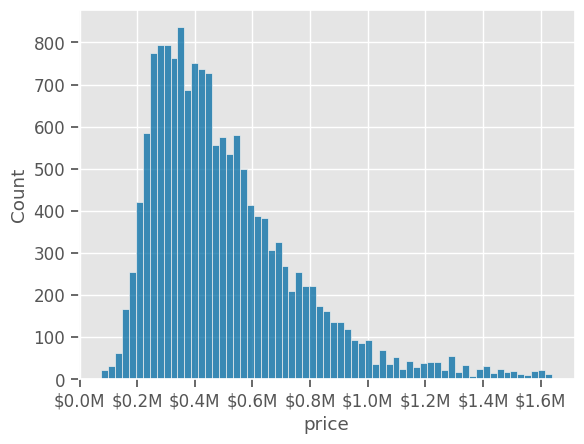

In [44]:
ax = sns.histplot(data=plot_df, x='price')
ax.xaxis.set_major_formatter(price_fmt_mill)

In [45]:

## FROM MY "From linear to logistic regression" mini-lesson (interview)
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True, 
                          figsize=(5,4)):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=1),
               scatter_kws=dict(s=10,ec='white',lw=1,alpha=0.8)
                    )
    ax.get_figure().set_size_inches(figsize)
    ax.set_title(f'{x} vs {y}')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    plt.tight_layout()
    return ax

In [46]:
# X_train_raw.columns

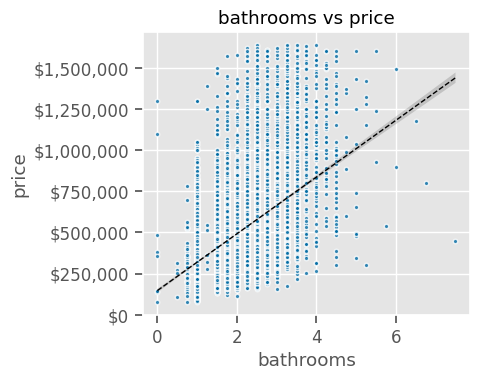

In [47]:
ax=plot_feature_vs_target(plot_df, x='bathrooms',y='price')


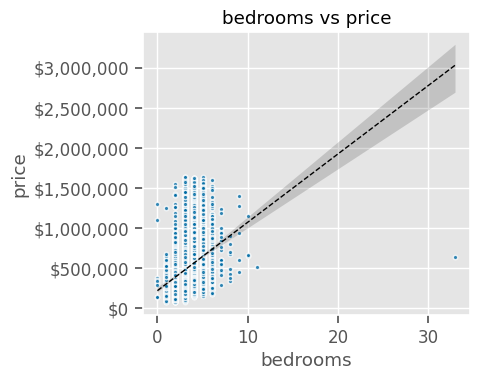

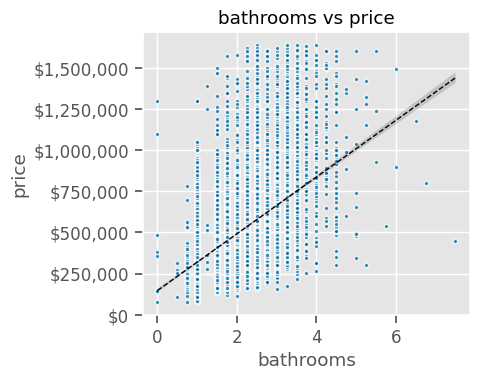

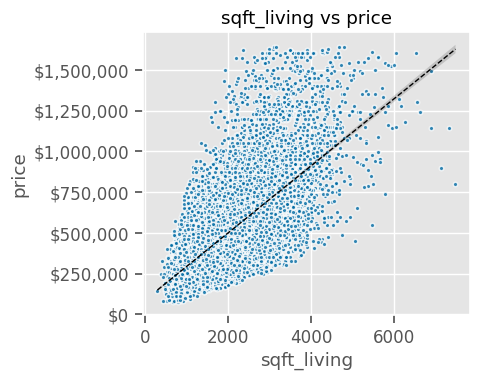

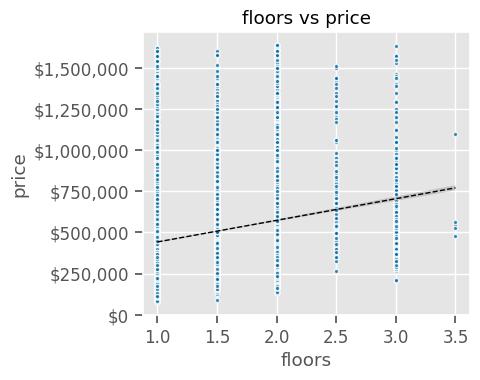

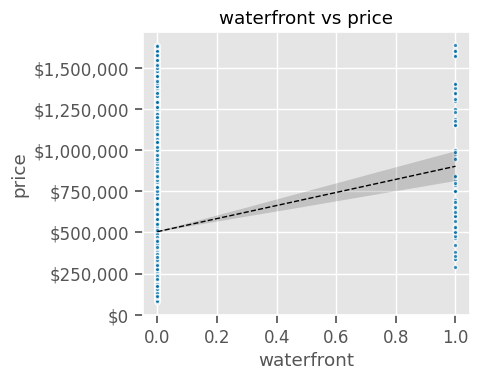

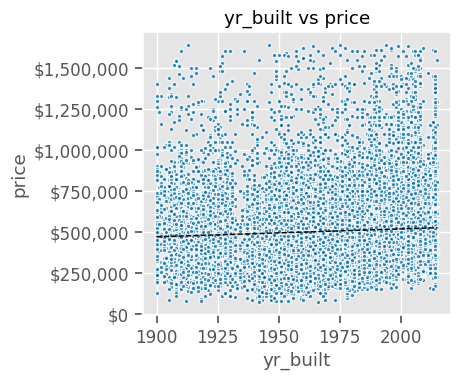

In [48]:
for feature in plot_df.drop(columns='price').columns:
    ax = plot_feature_vs_target(plot_df, x=feature,y='price')
    fig = ax.get_figure()
    fig.savefig(f'Images/regplot-{feature}-vs-price.png', dpi=300)
    plt.show()

## Effect of Scaling on Coefficients

In [49]:
target = 'price'
drop_cols_model = ['zipcode','lat','long','view','sqft_lot', 'view',
                   'condition','grade','sqft_above','sqft_basement',
                   'yr_renovated','sqft_living15', 'sqft_lot15']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


In [50]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')


num_pipe_raw = make_pipeline( SimpleImputer(strategy='median'))


## make the preprocessing column transformer
preprocessor_raw = make_column_transformer( (num_pipe_raw, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)


## Get feature names
preprocessor_raw.fit(X_train)
feature_names_raw = preprocessor_raw.get_feature_names_out()




### PREP ALL X VARS
## Prepare X_train_df
X_train_raw = pd.DataFrame( preprocessor_raw.transform(X_train), 
                          columns = feature_names_raw,
                         index = X_train.index)

## Prepare X_test_df
X_test_raw = pd.DataFrame( preprocessor_raw.transform(X_test),
                          columns = feature_names_raw,
                         index=X_test.index)
X_train_raw

bedrooms  bathrooms  sqft_living  floors  waterfront   yr_built
id                                                                         
2895600090    3.0000     1.0000   1,120.0000  1.0000      0.0000 1,954.0000
8563000110    4.0000     1.7500   1,460.0000  1.0000      0.0000 1,967.0000
2591800340    3.0000     2.2500   1,820.0000  2.0000      0.0000 1,983.0000
7215721330    3.0000     2.5000   1,650.0000  2.0000      0.0000 2,000.0000
2424059061    4.0000     3.5000   3,500.0000  2.0000      0.0000 2,014.0000
...              ...        ...          ...     ...         ...        ...
3211200140    4.0000     2.0000   1,720.0000  1.0000      0.0000 1,971.0000
6381502155    3.0000     1.0000   1,490.0000  1.0000      0.0000 1,954.0000
8964800695    3.0000     1.7500   2,230.0000  1.0000      0.0000 1,949.0000
2320069206    3.0000     1.0000   1,250.0000  1.5000      0.0000 1,939.0000
624100010     3.0000     2.5000   2,930.0000  1.5000      0.0000 1,983.0000

[15905 rows x 6 columns]

In [51]:
reg_raw = LinearRegression(fit_intercept=True)
reg_raw.fit(X_train_raw,y_train)
display(reg_raw)
evaluate_regression(reg_raw, X_train_raw, y_train, X_test_raw, y_test)

LinearRegression()

In [52]:
def get_coefficients(reg, name='Coefficients'):
    """Save a model's .coef_ and .intercept_ as a Pandas Series"""
    
    coeffs = pd.Series(reg.coef_, 
                       index= reg.feature_names_in_,
                       name=name)
    
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

## Saving the coefficients
coeffs = get_coefficients(reg_raw)
coeffs

bedrooms        -38,303.1744
bathrooms        48,126.0203
sqft_living         214.9420
floors           64,514.0470
waterfront      281,242.3219
yr_built         -2,599.5354
Intercept     5,124,664.8032
Name: Coefficients, dtype: float64

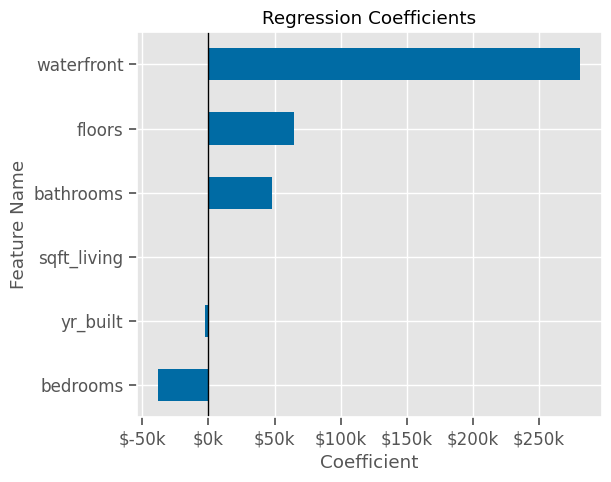

In [53]:
def plot_coefficients(coeffs, figsize=(6,5), title='Regression Coefficients',
                      intercept=True, intercept_name='Intercept',
                      sort_values=True, ascending=True, 
                      ):
    ## Exclude intercept if intercept==False
    if intercept==False:
        if intercept_name in coeffs:
            coeffs = coeffs.drop(intercept_name).copy()
    
    ## Sort values
    if sort_values:
        ceoffs = coeffs.sort_values(ascending=ascending)
 
    ## Plot
    ax = ceoffs.plot(kind='barh',figsize=figsize)
    
    ## Customize Viz 
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
    return ax


ax = plot_coefficients(coeffs, intercept=False)
ax.xaxis.set_major_formatter(price_fmt_thous)

### Raw Coefficients (viz)

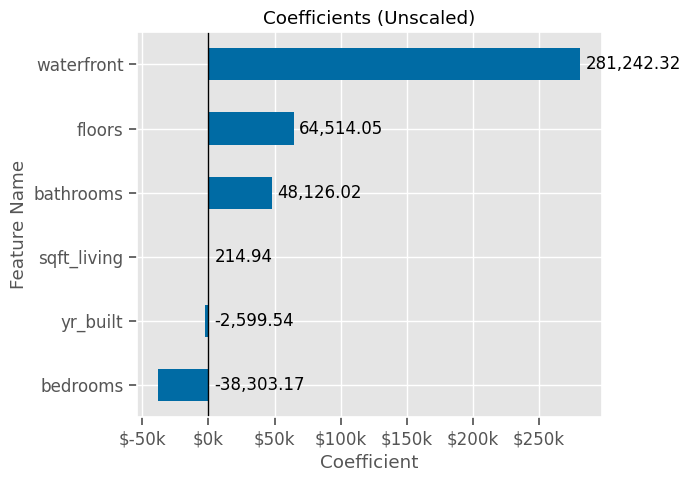

In [54]:
coeffs_raw = get_coefficients(reg_raw)
ax = plot_coefficients(coeffs_raw, intercept=False, title='Coefficients (Unscaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)
lp.annotate_hbars(ax)
ax.get_figure().savefig('Images/demo-unscaled-coeffs.png', dpi=300)

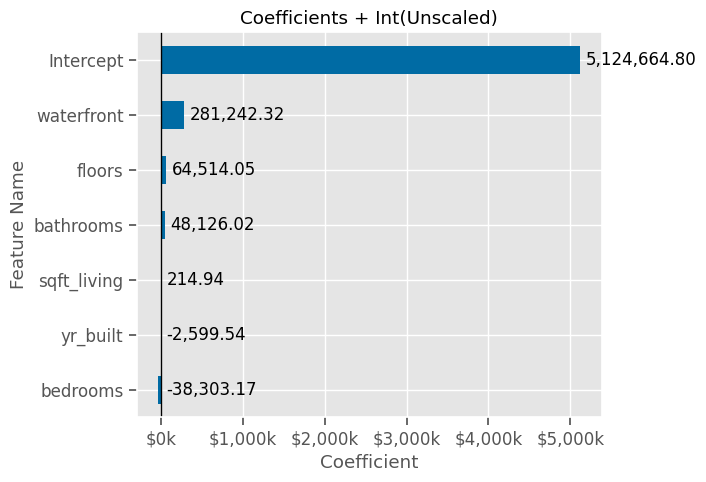

In [55]:
ax = plot_coefficients(coeffs_raw, intercept=True, title='Coefficients + Int(Unscaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)
lp.annotate_hbars(ax)
ax.get_figure().savefig('Images/demo-unscaled-coeffs-intercept.png', dpi=300)

## Scaled

In [56]:
num_pipe_scale = make_pipeline( SimpleImputer(strategy='mean'),  
                         StandardScaler()
                        )
preprocessor_scale = make_column_transformer( (num_pipe_scale, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)

preprocessor_scale.fit(X_train)
feature_names_scale = preprocessor_scale.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_scale = pd.DataFrame( preprocessor_scale.transform(X_train), 
                          columns = feature_names_scale,
                         index = X_train.index)

## Prepare X_test_df
X_test_scale = pd.DataFrame( preprocessor_scale.transform(X_test),
                          columns = feature_names_scale,
                         index=X_test.index)
X_train_scale

bedrooms  bathrooms  sqft_living  floors  waterfront  yr_built
id                                                                        
2895600090   -0.3752    -1.4696      -1.0886 -0.9064     -0.0641   -0.5794
8563000110    0.6943    -0.4542      -0.6813 -0.9064     -0.0641   -0.1353
2591800340   -0.3752     0.2228      -0.2500  0.9494     -0.0641    0.4111
7215721330   -0.3752     0.5613      -0.4537  0.9494     -0.0641    0.9918
2424059061    0.6943     1.9152       1.7626  0.9494     -0.0641    1.4699
...              ...        ...          ...     ...         ...       ...
3211200140    0.6943    -0.1157      -0.3698 -0.9064     -0.0641    0.0013
6381502155   -0.3752    -1.4696      -0.6454 -0.9064     -0.0641   -0.5794
8964800695   -0.3752    -0.4542       0.2411 -0.9064     -0.0641   -0.7501
2320069206   -0.3752    -1.4696      -0.9329  0.0215     -0.0641   -1.0917
624100010    -0.3752     0.5613       1.0797  0.0215     -0.0641    0.4111

[15905 rows x 6 columns]

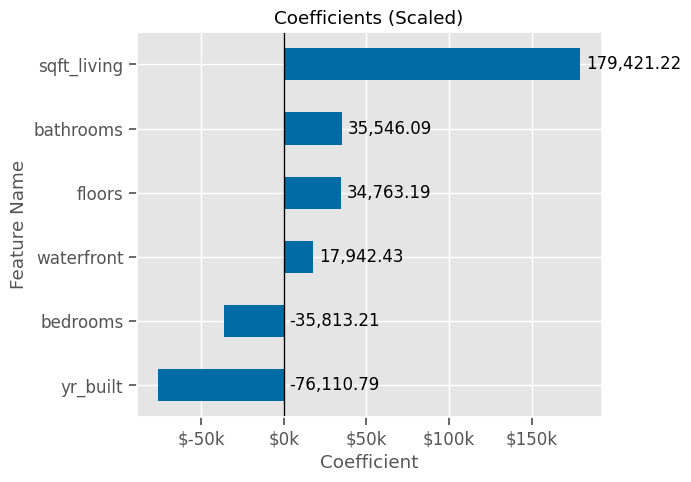

In [57]:
reg_scale = LinearRegression(fit_intercept=True)
reg_scale.fit(X_train_scale,y_train)
evaluate_regression(reg_scale, X_train_scale, y_train, X_test_scale, y_test)

coeffs_scale = get_coefficients(reg_scale)
ax = plot_coefficients(coeffs_scale,intercept=False, title='Coefficients (Scaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)

lp.annotate_hbars(ax)
ax.get_figure().savefig('Images/demo-scaled-coeffs.png', dpi=300)

### Getting STD of Features to Interpret Coefficient

In [58]:
std_for_coeffs = np.std(X_train_raw)
std_for_coeffs.name='Standard Deviation'
std_for_coeffs

bedrooms        0.9350
bathrooms       0.7386
sqft_living   834.7424
floors          0.5388
waterfront      0.0638
yr_built       29.2786
Name: Standard Deviation, dtype: float64

## Comparing Scaled vs Raw Side By Side

In [59]:
## QUICK AND DIRTY - NOT MEANT TO BE STUDENT-FACING
def plot_coeffs(coeffs, figsize=(6,5), intercept=True,
                intercept_name="Intercept", sort_values=True,
                ascending=True, ax=None, title='Regression Coefficients'):
    
    ## Make function get coeffs if coeffs in not series
    if isinstance(coeffs, pd.Series) == False:
        coeffs = get_coeffs(coeffs)
        
    if (intercept==False):
        if intercept_name in coeffs:
            coeffs_plot = coeffs.drop(intercept_name).copy()
        else: 
            raise Exception(f"{intercept_name} not found.")
    else:
        coeffs_plot=coeffs.copy()
    
    if sort_values:
        coeffs_plot = coeffs_plot.sort_values(ascending=ascending)
        
    if ax is None:
        
        ax = coeffs_plot.plot(kind='barh',figsize=figsize)
    else:
        coeffs_plot.plot(kind='barh',ax=ax)
        
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
#     plt.tight_layout()
    return ax

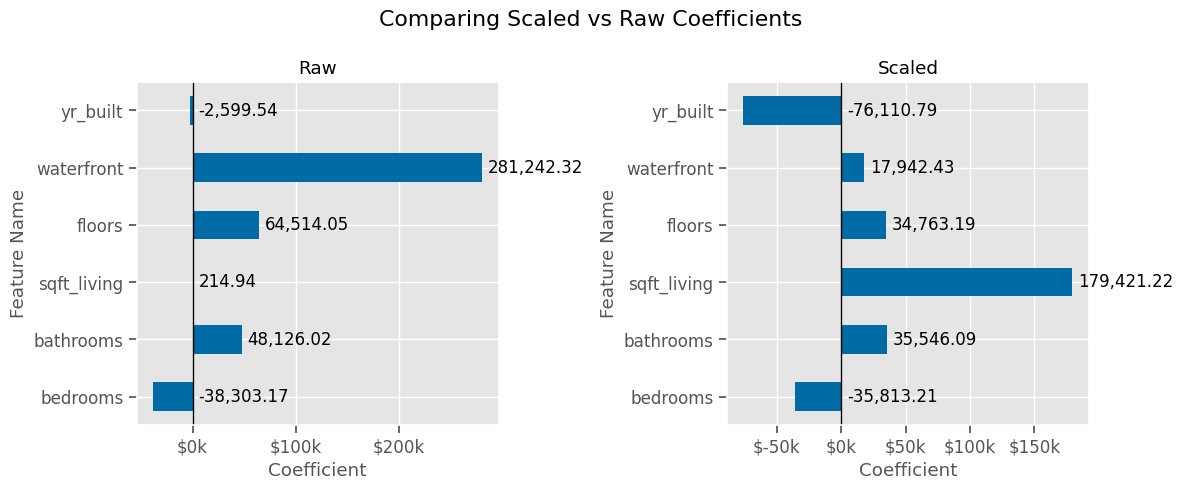

In [60]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

plot_coeffs(coeffs_raw, intercept=False,sort_values=False, ax=axes[0])
axes[0].set_title('Raw')
lp.annotate_hbars(axes[0])
axes[0].xaxis.set_major_formatter(price_fmt_thous)

plot_coeffs(reg_scale,intercept=False, sort_values=False,ax=axes[1])
axes[1].set_title('Scaled')
lp.annotate_hbars(axes[1])
axes[1].xaxis.set_major_formatter(price_fmt_thous)
# fig.set_size_inches((18,5))
fig.suptitle("Comparing Scaled vs Raw Coefficients")
fig.tight_layout();
fig.savefig('Images/demo_raw_scaled_coeffs.png',dpi=300)

In [61]:
X_train_df

bedrooms  bathrooms  sqft_living  floors  waterfront   yr_built
id                                                                         
2895600090    3.0000     1.0000   1,120.0000  1.0000      0.0000 1,954.0000
8563000110    4.0000     1.7500   1,460.0000  1.0000      0.0000 1,967.0000
2591800340    3.0000     2.2500   1,820.0000  2.0000      0.0000 1,983.0000
7215721330    3.0000     2.5000   1,650.0000  2.0000      0.0000 2,000.0000
2424059061    4.0000     3.5000   3,500.0000  2.0000      0.0000 2,014.0000
...              ...        ...          ...     ...         ...        ...
3211200140    4.0000     2.0000   1,720.0000  1.0000      0.0000 1,971.0000
6381502155    3.0000     1.0000   1,490.0000  1.0000      0.0000 1,954.0000
8964800695    3.0000     1.7500   2,230.0000  1.0000      0.0000 1,949.0000
2320069206    3.0000     1.0000   1,250.0000  1.5000      0.0000 1,939.0000
624100010     3.0000     2.5000   2,930.0000  1.5000      0.0000 1,983.0000

[15905 rows x 6 columns]

# Feature Importance

In [62]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree

In [63]:
MAX_DEPTH = 7
reg_tree = DecisionTreeRegressor(max_depth=MAX_DEPTH)#max_depth=MAX_DEPTH)
reg_tree.fit(X_train_raw,y_train)

display(reg_tree)
evaluate_regression(reg_tree, X_train_raw, y_train, 
                    X_test_raw, y_test)

DecisionTreeRegressor(max_depth=7)

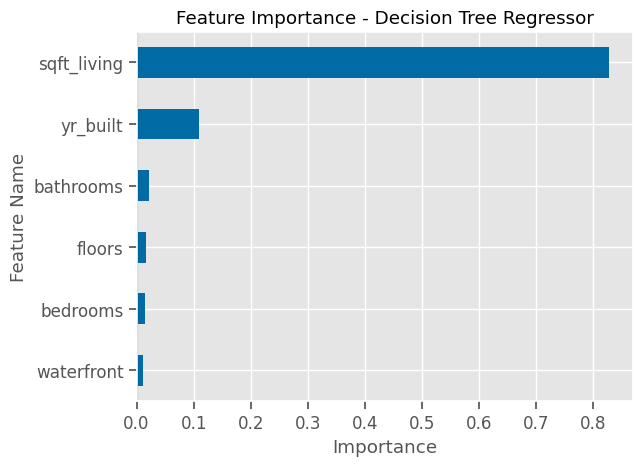

In [64]:
# Saving the coefficients
importances = pd.Series(reg_tree.feature_importances_, index= reg_tree.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('Images/feature-importance-tree.png', dpi=300)

In [65]:
# plot_tree?

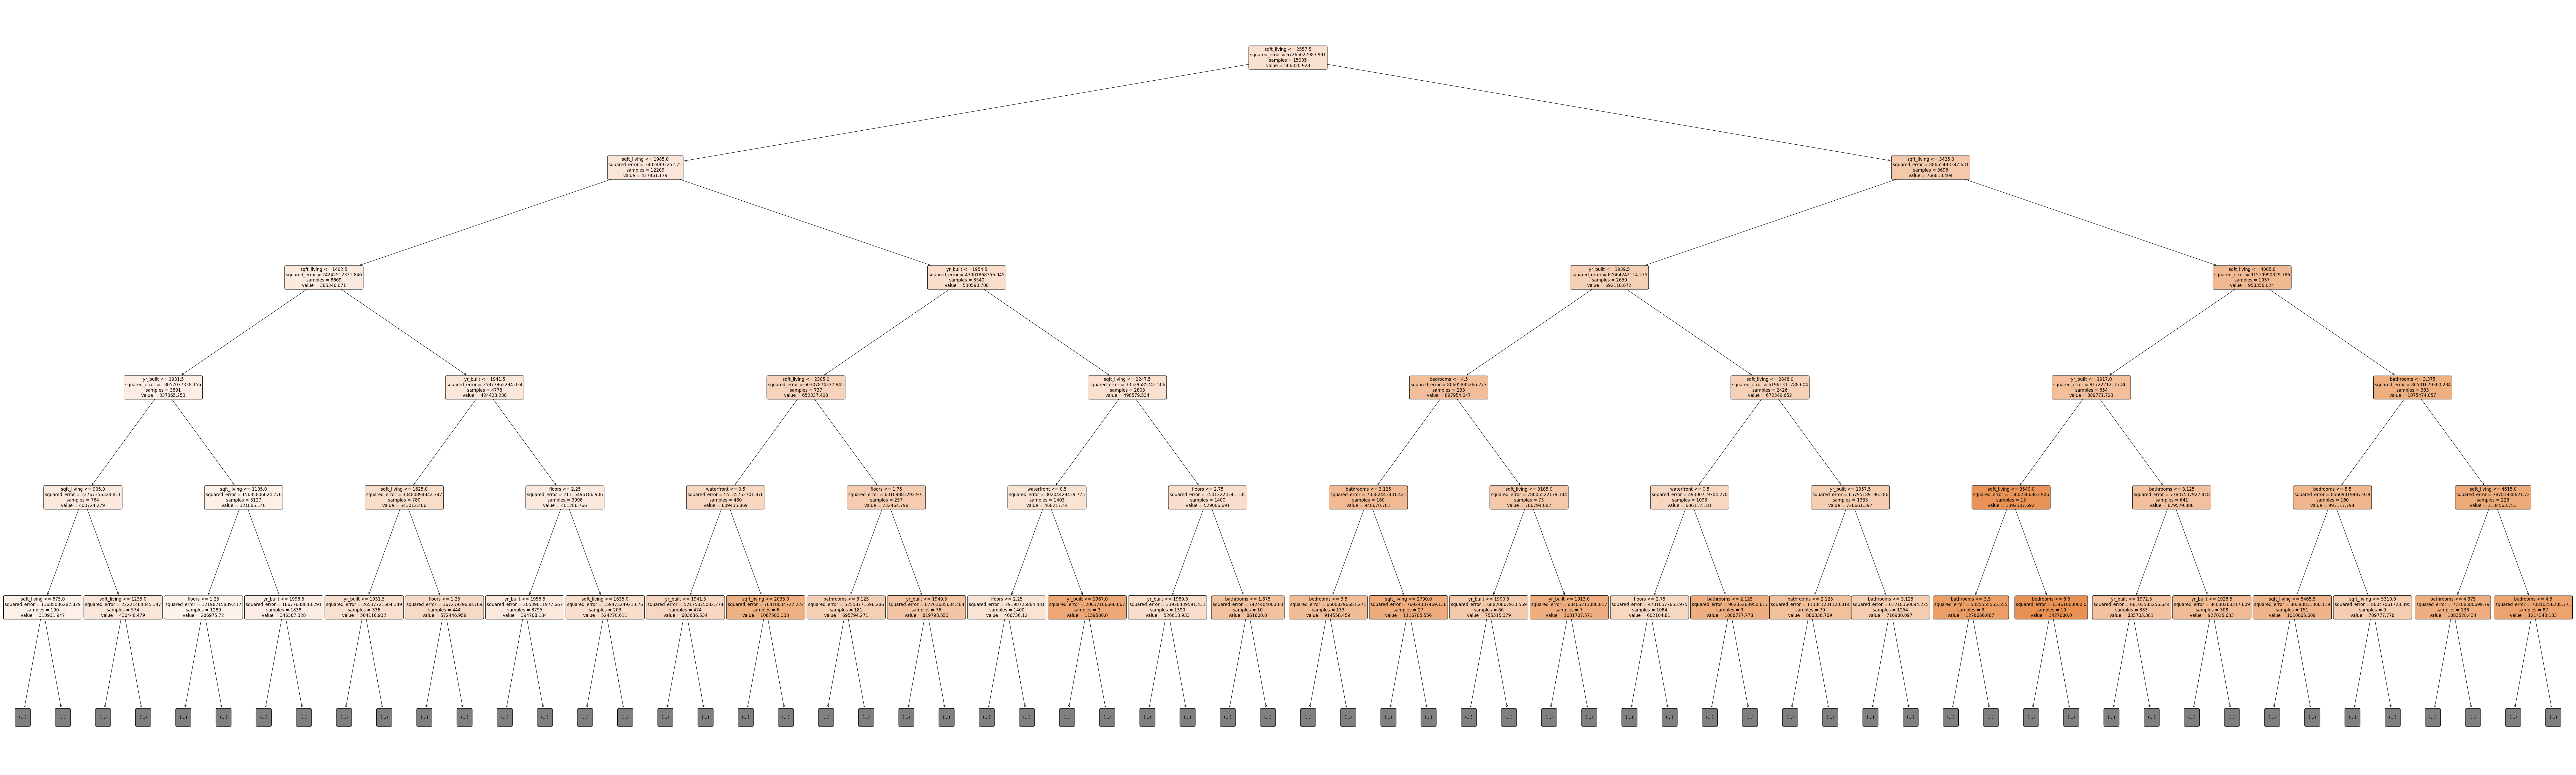

In [66]:
PLOT_DEPTH = 5
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(100,30))
    plot_tree(reg_tree,filled=True,max_depth=PLOT_DEPTH, rounded=True,
              feature_names=reg_tree.feature_names_in_,
             fontsize=12,ax=ax);
    fig.tight_layout()
    
    fig.savefig(f'Images/plot_tree_demo_depth{PLOT_DEPTH}.png',dpi=150,
               bbox_inches='tight',facecolor='white')

# Shap (For Regression)

In [67]:
# Import and init shap
import shap
shap.initjs()

In [68]:
# Take a sample of the training data
X_shap = shap.sample(X_train_raw,nsamples = 1000,random_state=321)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(reg_tree)
explainer

In [69]:
## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [70]:
## nrows, ncols for X_shap
X_shap.shape

(1000, 6)

In [71]:
## nrows, ncols, nclasses for shap_values
shap_values.shape

(1000, 6)

### Shap Explanation Objects

In [72]:
# A single observation/explanation
explanation0 = shap_values[0]
explanation0

.values =
array([   1276.96062065,   -6293.18110415, -145022.3785216 ,
         -3987.45285253,    -491.42183151,   28408.84857648])

.base_values =
array([506320.92769569])

.data =
array([3.00e+00, 2.00e+00, 1.29e+03, 1.00e+00, 0.00e+00, 1.95e+03])

In [73]:
# explanation's .data is just the original X-rows values
display(explanation0.data)
X_shap.iloc[0].values

array([3.00e+00, 2.00e+00, 1.29e+03, 1.00e+00, 0.00e+00, 1.95e+03])

array([3.00e+00, 2.00e+00, 1.29e+03, 1.00e+00, 0.00e+00, 1.95e+03])

> Base value is mean of y_train

In [74]:
explanation0.base_values

array([506320.92769569])

In [75]:
y_train.mean()

506320.92769569316

### Summary Plot

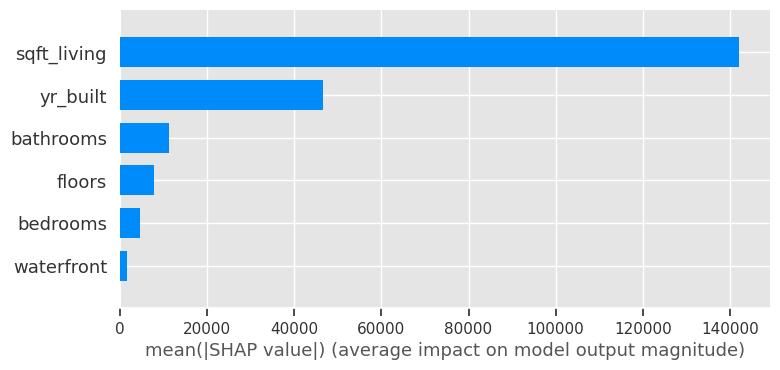

In [76]:
shap.summary_plot(shap_values, 
                  features= X_shap,
                  plot_type='bar')

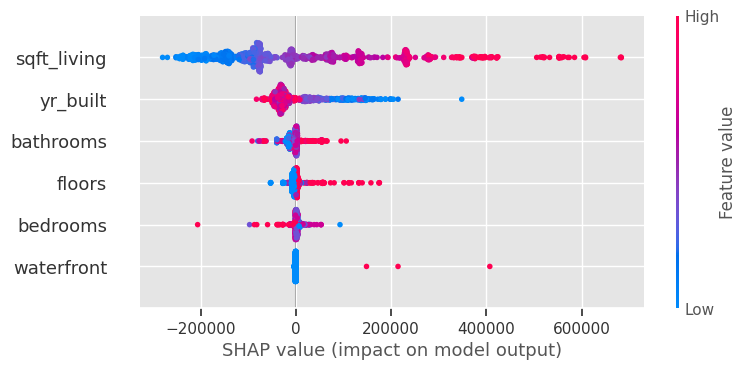

In [77]:
shap.summary_plot(shap_values, features = X_shap)

# Local Explanations

## Shap Force Plot

In [78]:
## Making a local vers of X_shap/y_shap with new indices to match shap_values
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

# finding the row with the most bedroms
many_bedrooms= X_shap_local['bedrooms'].idxmax()
X_shap_local.loc[many_bedrooms]

bedrooms          7.0000
bathrooms         4.0000
sqft_living   2,690.0000
floors            1.0000
waterfront        0.0000
yr_built      1,960.0000
Name: 840, dtype: float64

In [79]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[many_bedrooms].values,
               features=X_shap_local.loc[many_bedrooms])

## Lime

In [80]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap_local.values,  
    feature_names=X_shap_local.columns,
   mode='regression')
lime_explainer

In [81]:
exp = lime_explainer.explain_instance(X_shap_local.loc[many_bedrooms],
                               reg_tree.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


# OLD CLASSIFICATION TASK BELOW

##  Pivot Classification

In [82]:
# THRESH = 1e6
# df_ml['Expensive'] = df_ml['price'] > THRESH

# grid_spec = {'width_ratios':[0.8,0.2]}
# fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

# ax=axes[0]
# sns.boxplot(data=df_ml,x='price',ax=ax)
# ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
# ax.legend()
# # ax.get_figure().set_size_inches(10,4)


# ax = axes[1]
# ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

# fig.tight_layout()

In [83]:
def make_target_and_plot(df_ml, THRESH = 1e6):
    df_ml = df_ml.copy()
    df_ml['Expensive'] = df_ml['price'] > THRESH

    grid_spec = {'width_ratios':[0.8,0.2]}
    fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

    ax=axes[0]
    sns.boxplot(data=df_ml,x='price',ax=ax)
    ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
    ax.legend()
    # ax.get_figure().set_size_inches(10,4)


    ax = axes[1]
    ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

    fig.tight_layout()
    
    return df_ml

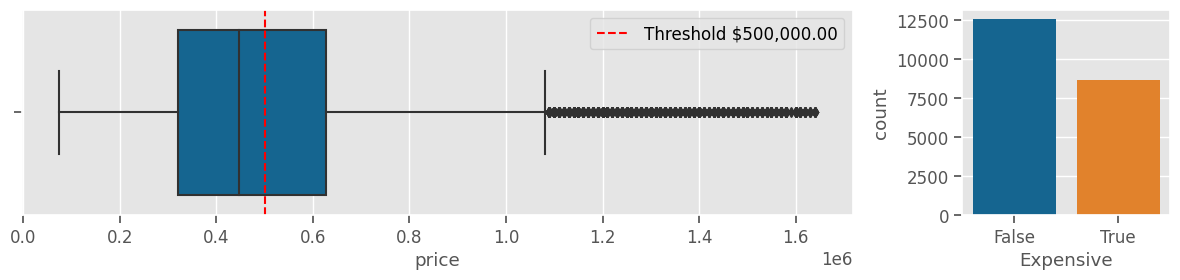

In [84]:
df_ml = make_target_and_plot(df_ml, THRESH=500_000)

In [85]:
## Make x and y variables
target = 'Expensive'
drop_cols_model = ['zipcode','lat','long','view','price']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
2424059061    4.0000     3.5000   3,500.0000 43,560.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

            condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                   
2895600090     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
2424059061     3.0000 9.0000  2,850.0000       650.0000 2,014.0000   
...               ...    ...         ...            ...        ...   
3211200140     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010      3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090        0.0000     1,410.0000  6,328.0000  
8563000110        0.0000     1,820.0000  9,840.0000  
2591800340        0.0000     1,900.0000  7,526.0000  
7215721330        0.0000     1,650.0000  4,559.0000  
2424059061        0.0000     3,640.0000 40,545.0000  
...                  ...            ...         ...  
3211200140        0.0000     1,250.0000  7,210.0000  
6381502155        0.0000     1,280.0000  7,200.0000  
8964800695        0.0000     2,230.0000 11,900.0000  
2320069206        0.0000     1,250.0000  8,792.0000  
624100010         0.0000     3,160.0000 20,492.0000  

[15905 rows x 14 columns]

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf = RandomForestClassifier()
clf.fit(X_train_df,y_train)

RandomForestClassifier()

--------------------------------------------------------------------------------
	CLASSIFICATION REPORT : (Admin)
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9437
        True       1.00      1.00      1.00      6468

    accuracy                           1.00     15905
   macro avg       1.00      1.00      1.00     15905
weighted avg       1.00      1.00      1.00     15905



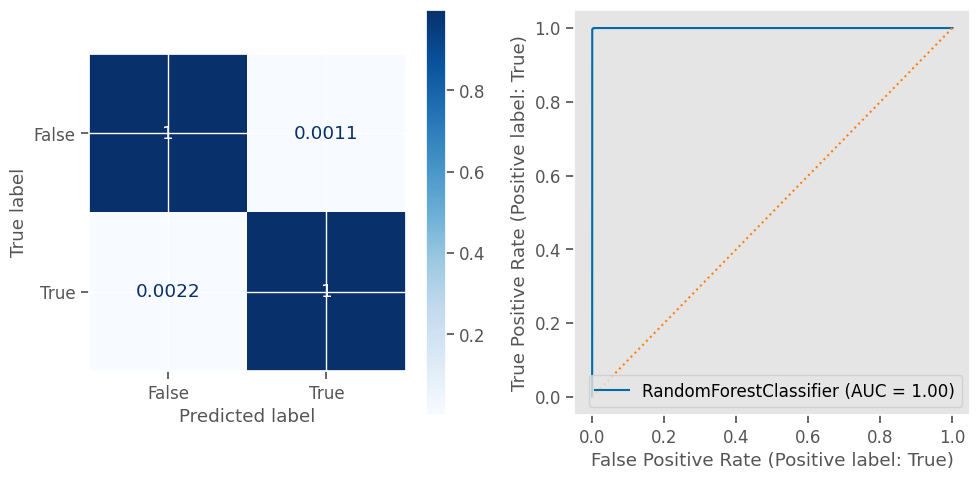

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.85      0.88      0.86      3123
        True       0.81      0.77      0.79      2179

    accuracy                           0.83      5302
   macro avg       0.83      0.82      0.83      5302
weighted avg       0.83      0.83      0.83      5302



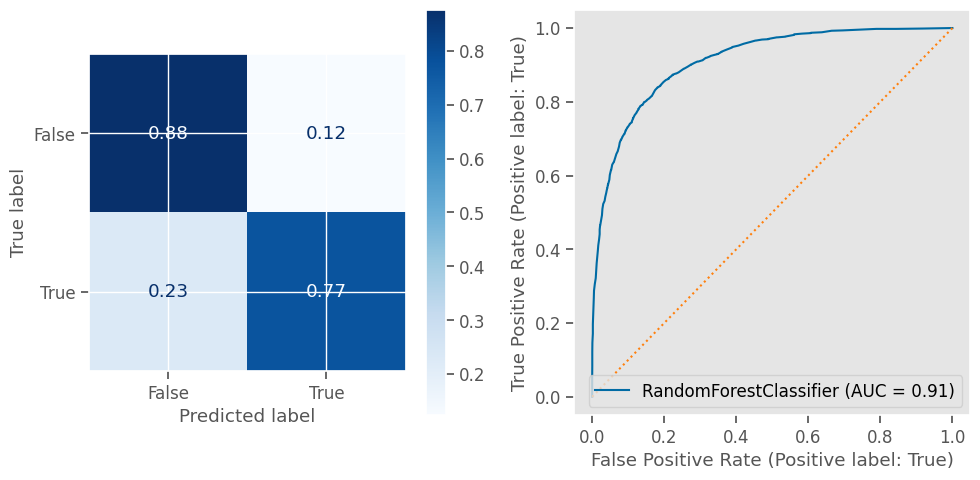

In [88]:
lp.evaluate_classification_admin(clf, X_train_df, y_train, X_test_df, y_test)

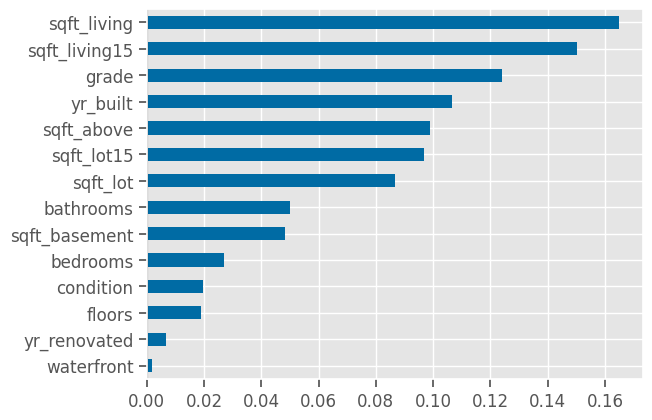

In [89]:
# Saving the coefficients
importances = pd.Series(clf.feature_importances_, index= clf.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')

## Model Explainers - SHAP

In [90]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [91]:
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

In [92]:
explainer = shap.Explainer(clf)
explainer

In [93]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [94]:
X_shap.shape

(500, 14)

In [95]:
shap_values.shape

(500, 14, 2)

In [96]:
shap_vals_expensive = shap_values[:,:,1]
shap_vals_expensive.shape

(500, 14)

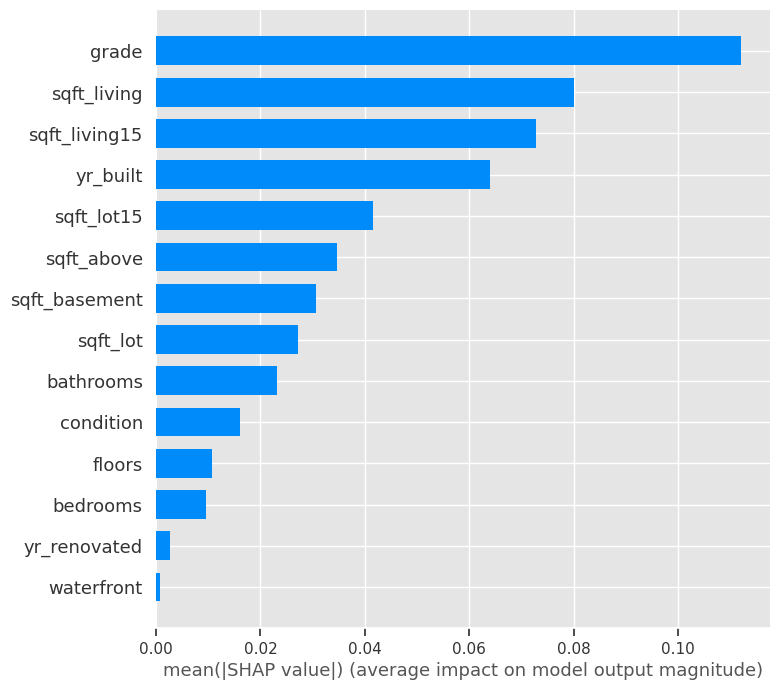

In [97]:
shap.summary_plot(shap_vals_expensive,features= X_shap, plot_type='bar')

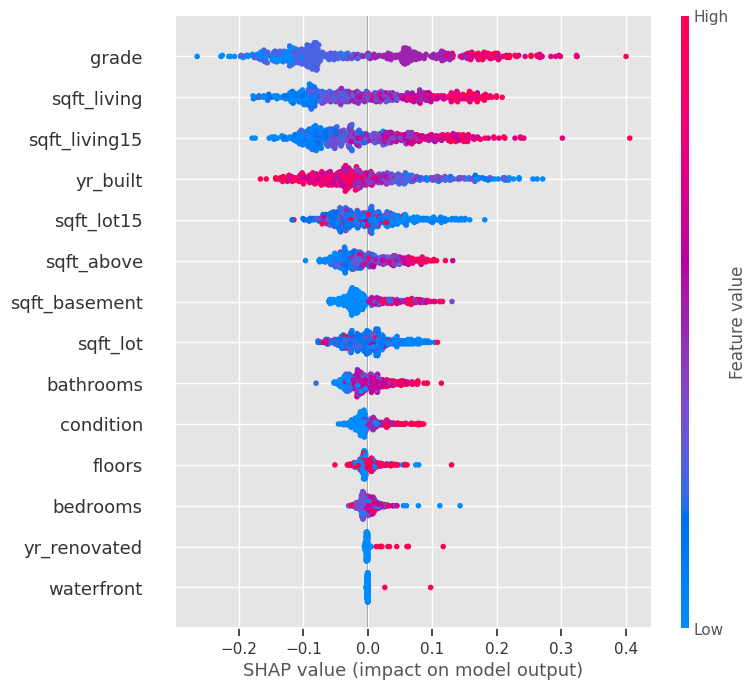

In [98]:
shap.summary_plot(shap_vals_expensive,X_shap)

In [99]:
# shap.dependence_plot("yr_built",shap_vals_expensive.values,features=X_shap)